In [1]:
import pandas as pd 
import numpy as np

In [2]:
spotify_df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
spotify_copy = spotify_df.copy()
spotify_copy.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
spotify_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
X_features = list(spotify_copy.columns)
X_features

['genre',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

In [6]:
categorical_features = ['genre', 'artist_name', 'track_name', 'key', 'mode']

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
for column in categorical_features:
    spotify_copy[column] = label_encoder.fit_transform(spotify_copy[column])
spotify_copy.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,5181,18348,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,4/4,0.814
1,15,8254,92963,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,4/4,0.816
2,15,6451,32194,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,5/4,0.368
3,15,5181,30998,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,4/4,0.227
4,15,4074,90793,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,4/4,0.390


In [9]:
X_features.remove('popularity')
X_features.remove('time_signature')
X_features.remove('track_id')
X_features

['genre',
 'artist_name',
 'track_name',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [10]:
import statsmodels.api as sm

In [11]:
X = sm.add_constant(spotify_copy[X_features])

In [12]:
Y = spotify_copy['popularity']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [15]:
spotify_ols_model = sm.OLS(y_train, X_train).fit()

In [16]:
print(spotify_ols_model.params)

const               51.783188
genre                0.180270
artist_name          0.000022
track_name          -0.000005
acousticness       -11.313196
danceability        16.885685
duration_ms          0.000002
energy              -4.912722
instrumentalness    -4.732336
key                  0.051506
liveness            -9.518336
loudness             0.711715
mode                 1.681461
speechiness         -7.671657
tempo               -0.002540
valence            -12.941715
dtype: float64


In [17]:
spotify_ols_model.summary2()#all the variables are significant as the p-value is less than 0.05 and the 
#variation in popularity is explained by 24.2%

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.242       
Dependent Variable: popularity       AIC:                1556734.8497
Date:               2023-10-16 13:59 BIC:                1556897.0012
No. Observations:   186180           Log-Likelihood:     -7.7835e+05 
Df Model:           15               F-statistic:        3957.       
Df Residuals:       186164           Prob (F-statistic): 0.00        
R-squared:          0.242            Scale:              250.51      
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
const              51.7832   0.4087 126.7059 0.0000  50.9822  52.5842
genre               0.1803   0.0050  36.2281 0.0000   0.1705   0.1900
artist_name         0.0000   0.0000   2.4514 0.0142   0.0000   0.0000
track_name         -0.0000   0.0000  -5.9306 0.0000  -0.0000  -0.0000
acousticness      -11.3132   0.1725 -65.5839 0.0000 -11.6513 -10.9751
danceability       16.8857   0.2698  62.5967 0.0000  16.3570  17.4144
duration_ms         0.0000   0.0000   7.2993 0.0000   0.0000   0.0000
energy             -4.9127   0.3114 -15.7763 0.0000  -5.5231  -4.3024
instrumentalness   -4.7323   0.1485 -31.8642 0.0000  -5.0234  -4.4412
key                 0.0515   0.0106   4.8516 0.0000   0.0307   0.0723
liveness           -9.5183   0.2236 -42.5652 0.0000  -9.9566  -9.0801
loudness            0.7117   0.0125  56.8553 0.0000   0.6872   0.7363
mode                1.6815   0.0778  21.6037 0.0000   1.5289   1.8340
speechiness        -7.6717   0.2569 -29.8568 0.0000  -8.1753  -7.1680
tempo              -0.0025   0.0012  -2.0427 0.0411  -0.0050  -0.0001
valence           -12.9417   0.1846 -70.1147 0.0000 -13.3035 -12.5799
---------------------------------------------------------------------
Omnibus:              3259.106       Durbin-Watson:          2.005   
Prob(Omnibus):        0.000          Jarque-Bera (JB):       3400.695
Skew:                 -0.325         Prob(JB):               0.000   
Kurtosis:             2.873          Condition No.:          3840564 
=====================================================================
* The condition number is large (4e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

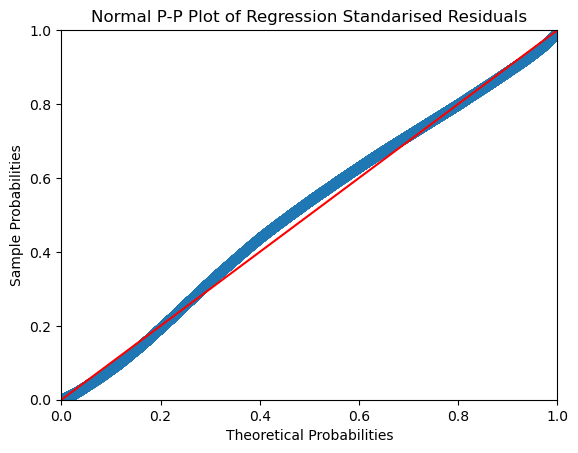

In [19]:
spotify_copy_resid = spotify_ols_model.resid_pearson
probplot = sm.ProbPlot(spotify_copy_resid)
plt.figure(figsize= (8,6))
probplot.ppplot(line= '45')
plt.title('Normal P-P Plot of Regression Standarised Residuals')
plt.show()

In [20]:
def get_standardised_vals(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardised Residuals')

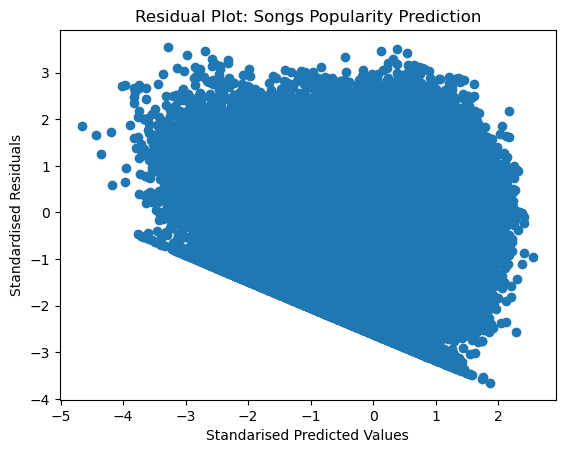

In [21]:
plt.scatter(get_standardised_vals(spotify_ols_model.fittedvalues), get_standardised_vals(spotify_copy_resid))
plt.title('Residual Plot: Songs Popularity Prediction')
plt.xlabel('Standarised Predicted Values')
plt.ylabel('Standardised Residuals')#residuals are not scattered

In [22]:
from scipy.stats import zscore

In [23]:
spotify_copy['zscore_popularity'] = zscore(spotify_copy.popularity)
spotify_copy.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,zscore_popularity
0,15,5181,18348,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,4/4,0.814,-2.261007
1,15,8254,92963,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,4/4,0.816,-2.206031
2,15,6451,32194,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,5/4,0.368,-2.096080
3,15,5181,30998,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,4/4,0.227,-2.261007
4,15,4074,90793,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,4/4,0.390,-2.041104


In [24]:
spotify_copy[(spotify_copy.zscore_popularity > 3) | (spotify_copy.zscore_popularity < -3)]#shows that there are 
#outliers in the data set

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,zscore_popularity
9026,9,828,145166,4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,8,0.1060,-5.290,1,0.0917,169.999,4/4,0.335,3.181572
9027,9,828,2189,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,4,0.0884,-10.744,1,0.3230,70.142,4/4,0.319,3.236547
9028,9,5026,141474,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,201661,0.488,0.000009,9,0.0936,-7.050,0,0.0705,136.041,4/4,0.533,3.071621
9037,9,978,116974,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,4,0.1660,-4.724,0,0.0476,133.002,4/4,0.628,3.071621
9048,9,2902,118565,4w8niZpiMy6qz1mntFA5uM,96,0.1530,0.841,212500,0.798,0.000003,4,0.0618,-4.206,1,0.2290,95.948,4/4,0.591,3.016645
22169,10,2902,118565,4w8niZpiMy6qz1mntFA5uM,96,0.1530,0.841,212500,0.798,0.000003,4,0.0618,-4.206,1,0.2290,95.948,4/4,0.591,3.016645
66607,12,5609,74699,2JvzF1RMd7lE3KmFlsyZD8,96,0.1490,0.837,213594,0.364,0.000000,11,0.2710,-11.713,0,0.2760,123.984,4/4,0.463,3.016645
66643,12,2934,24523,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,4/4,0.656,3.126596
86951,19,10080,142226,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,2,0.1010,-7.399,1,0.1780,99.947,4/4,0.385,3.181572
86952,19,5609,74699,2JvzF1RMd7lE3KmFlsyZD8,96,0.1490,0.837,213594,0.364,0.000000,11,0.2710,-11.713,0,0.2760,123.984,4/4,0.463,3.016645


In [25]:
filtered_spotify_copy = spotify_copy[(spotify_copy.zscore_popularity <= 3) & 
                                     (spotify_copy.zscore_popularity >= -3)]
filtered_spotify_copy.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,zscore_popularity
0,15,5181,18348,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,4/4,0.814,-2.261007
1,15,8254,92963,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,4/4,0.816,-2.206031
2,15,6451,32194,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,5/4,0.368,-2.096080
3,15,5181,30998,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,4/4,0.227,-2.261007
4,15,4074,90793,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,4/4,0.390,-2.041104


In [26]:
filtered_spotify_copy.drop(columns= ['zscore_popularity'], inplace= True)

/var/folders/3q/2bh9znv97bl09382p2y_xj9m0000gn/T/ipykernel_12421/2546252966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_spotify_copy.drop(columns= ['zscore_popularity'], inplace= True)


In [27]:
filtered_spotify_copy.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,5181,18348,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,4/4,0.814
1,15,8254,92963,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,4/4,0.816
2,15,6451,32194,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,5/4,0.368
3,15,5181,30998,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,4/4,0.227
4,15,4074,90793,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,4/4,0.390


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
def get_vif(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [30]:
vif_factors = get_vif(X[X_features])
vif_factors#vif greater than 4 needs to be looked into as it could lead to multicollinearity

,column,VIF
0,genre,4.232195
1,artist_name,3.927472
2,track_name,3.882848
3,acousticness,4.730657
4,danceability,13.103326
5,duration_ms,4.788933
6,energy,15.306812
7,instrumentalness,1.852682
8,key,3.320526
9,liveness,3.175171


In [31]:
vif_greaterthan_4 = vif_factors[vif_factors.VIF > 4].column

Text(0.5, 1.0, 'Correlation between features')

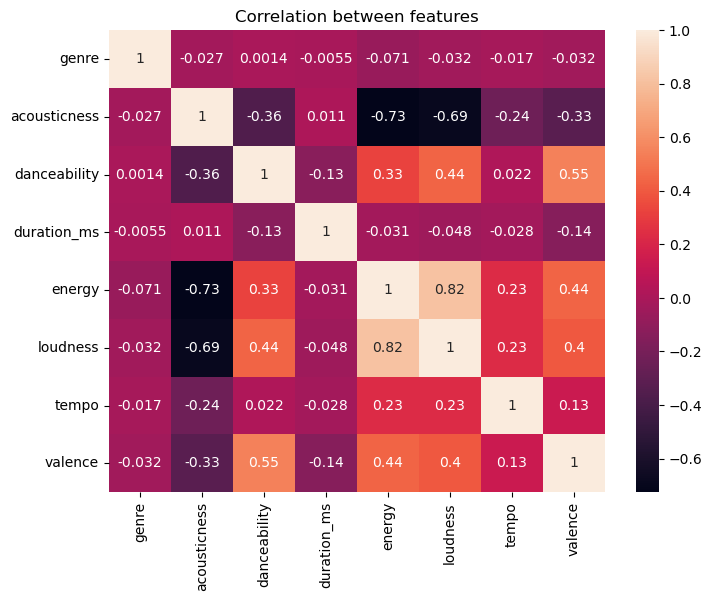

In [32]:
plt.figure(figsize= (8,6))
sn.heatmap(X[vif_greaterthan_4].corr(), annot= True)
plt.title('Correlation between features')
#here loudness and energy have a very high coorelation

In [33]:
remove_column = ['energy']

In [34]:
X_new_features = list(set(X_features) - set(remove_column))

In [35]:
vif_factors = get_vif(X[X_new_features])
vif_factors

,column,VIF
0,instrumentalness,1.811978
1,tempo,10.954766
2,valence,6.225717
3,key,3.259016
4,liveness,2.911065
5,track_name,3.802699
6,danceability,12.735910
7,acousticness,4.234284
8,genre,4.164289
9,duration_ms,4.547293


In [36]:
vif_greaterthan_4 = vif_factors[vif_factors.VIF > 4].column

Text(0.5, 1.0, 'Correlation between features')

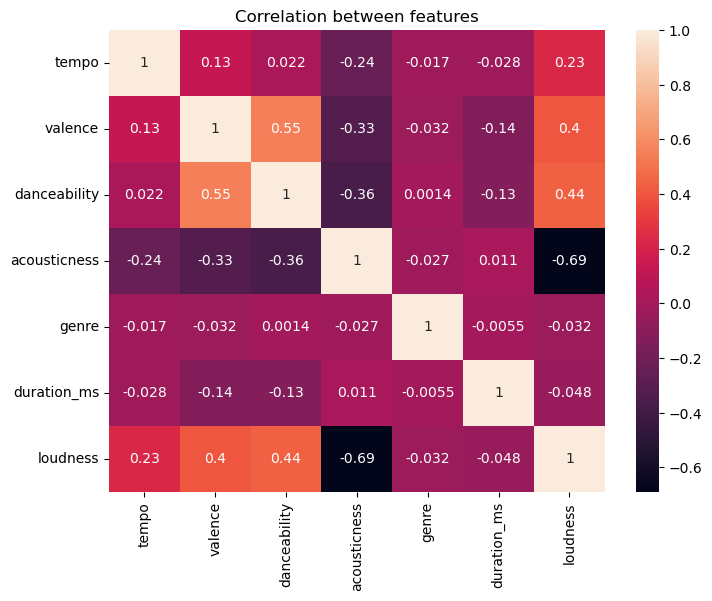

In [37]:
plt.figure(figsize= (8,6))
sn.heatmap(X[vif_greaterthan_4].corr(), annot= True)
plt.title('Correlation between features')

In [38]:
X_new_features.remove('valence')
X_new_features

['instrumentalness',
 'tempo',
 'key',
 'liveness',
 'track_name',
 'danceability',
 'acousticness',
 'genre',
 'duration_ms',
 'speechiness',
 'artist_name',
 'loudness',
 'mode']

In [39]:
vif_factors = get_vif(X[X_new_features])
vif_factors

,column,VIF
0,instrumentalness,1.807069
1,tempo,10.637917
2,key,3.258033
3,liveness,2.891645
4,track_name,3.801474
5,danceability,8.815225
6,acousticness,4.233197
7,genre,4.162962
8,duration_ms,4.525201
9,speechiness,2.143918


In [40]:
vif_greaterthan_4 = vif_factors[vif_factors.VIF > 4].column

Text(0.5, 1.0, 'Correlation between features')

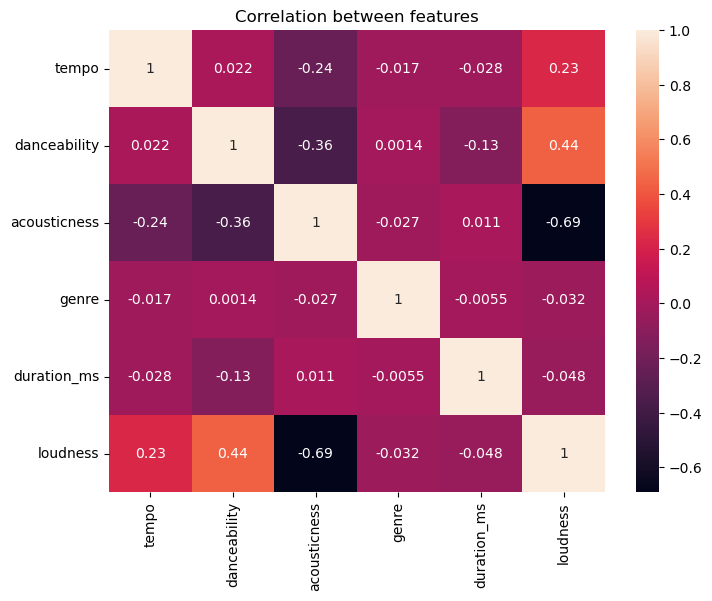

In [41]:
plt.figure(figsize= (8,6))
sn.heatmap(X[vif_greaterthan_4].corr(), annot= True)
plt.title('Correlation between features')

In [42]:
X_new_features.remove('danceability')
X_new_features

['instrumentalness',
 'tempo',
 'key',
 'liveness',
 'track_name',
 'acousticness',
 'genre',
 'duration_ms',
 'speechiness',
 'artist_name',
 'loudness',
 'mode']

In [43]:
vif_factors = get_vif(X[X_new_features])
vif_factors

,column,VIF
0,instrumentalness,1.753745
1,tempo,8.755880
2,key,3.179967
3,liveness,2.887368
4,track_name,3.710546
5,acousticness,4.209491
6,genre,3.959769
7,duration_ms,4.475632
8,speechiness,2.050554
9,artist_name,3.696788


In [44]:
vif_greaterthan_4 = vif_factors[vif_factors.VIF > 4].column

Text(0.5, 1.0, 'Correlation between features')

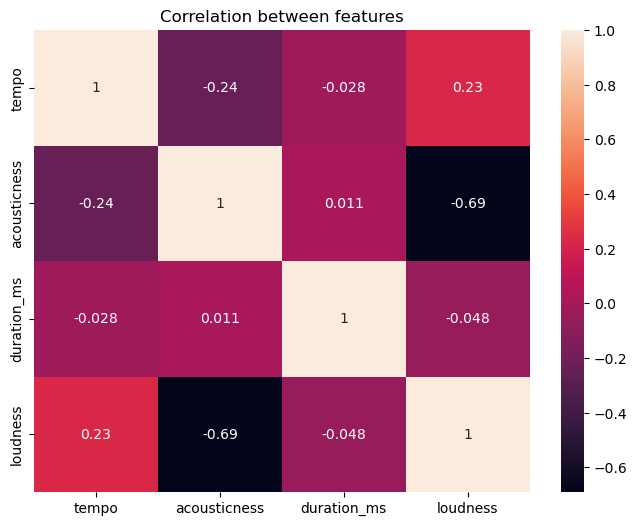

In [45]:
plt.figure(figsize= (8,6))
sn.heatmap(X[vif_greaterthan_4].corr(), annot= True)
plt.title('Correlation between features')

In [46]:
X_new_features.remove('duration_ms')
X_new_features

['instrumentalness',
 'tempo',
 'key',
 'liveness',
 'track_name',
 'acousticness',
 'genre',
 'speechiness',
 'artist_name',
 'loudness',
 'mode']

In [47]:
vif_factors = get_vif(X[X_new_features])
vif_factors

,column,VIF
0,instrumentalness,1.750891
1,tempo,8.068585
2,key,3.159014
3,liveness,2.858380
4,track_name,3.675301
5,acousticness,4.208815
6,genre,3.920300
7,speechiness,2.050542
8,artist_name,3.672297
9,loudness,7.710911


In [48]:
vif_greaterthan_4 = vif_factors[vif_factors.VIF > 4].column 

Text(0.5, 1.0, 'Correlation between features')

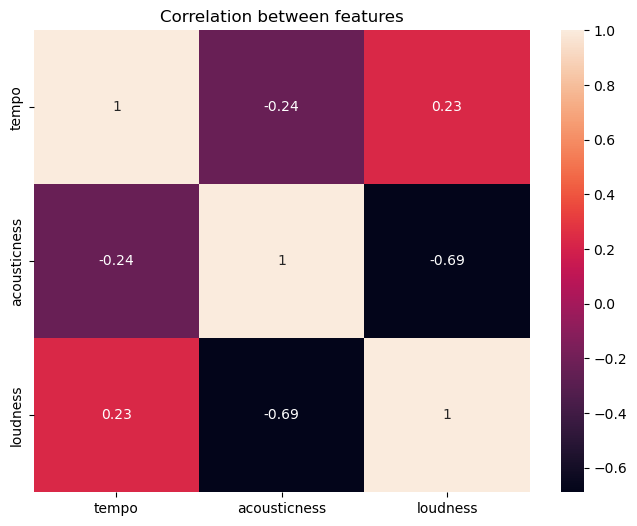

In [49]:
plt.figure(figsize= (8,6))
sn.heatmap(X[vif_greaterthan_4].corr(), annot= True)
plt.title('Correlation between features')

In [50]:
X_new_features.remove('loudness')
X_new_features

['instrumentalness',
 'tempo',
 'key',
 'liveness',
 'track_name',
 'acousticness',
 'genre',
 'speechiness',
 'artist_name',
 'mode']

In [51]:
vif_factors = get_vif(X[X_new_features])
vif_factors

,column,VIF
0,instrumentalness,1.471451
1,tempo,7.851178
2,key,3.139561
3,liveness,2.858379
4,track_name,3.653668
5,acousticness,2.326762
6,genre,3.832944
7,speechiness,2.050491
8,artist_name,3.656364
9,mode,1.525595


In [52]:
X_new_features.remove('tempo')
X_new_features

['instrumentalness',
 'key',
 'liveness',
 'track_name',
 'acousticness',
 'genre',
 'speechiness',
 'artist_name',
 'mode']

In [53]:
vif_factors = get_vif(X[X_new_features])
vif_factors

,column,VIF
0,instrumentalness,1.471251
1,key,2.874444
2,liveness,2.776794
3,track_name,3.264206
4,acousticness,2.325102
5,genre,3.327556
6,speechiness,2.049970
7,artist_name,3.199330
8,mode,1.500254


In [54]:
X_train = X_train[X_new_features]
spotify_ols_model_2 = sm.OLS(y_train, X_train).fit()

In [55]:
spotify_ols_model_2.summary2()#the model has improved the R2 to 80% that is it explains the popularity by 80%

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.800       
Dependent Variable:     popularity       AIC:                         1646245.9293
Date:                   2023-10-16 14:01 BIC:                         1646337.1396
No. Observations:       186180           Log-Likelihood:              -8.2311e+05 
Df Model:               9                F-statistic:                 8.255e+04   
Df Residuals:           186171           Prob (F-statistic):          0.00        
R-squared (uncentered): 0.800            Scale:                       405.17      
-------------------------------------------------------------------------------------
                       Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-------------------------------------------------------------------------------------
instrumentalness      -6.3789      0.1678    -38.0070    0.0000    -6.7078    -6.0499
key                    1.3880      0.0124    111.7559    0.0000     1.3637     1.4124
liveness               5.1638      0.2658     19.4255    0.0000     4.6428     5.6848
track_name             0.0001      0.0000    113.6025    0.0000     0.0001     0.0001
acousticness          -7.6778      0.1390    -55.2355    0.0000    -7.9502    -7.4053
genre                  0.9783      0.0055    178.6282    0.0000     0.9676     0.9890
speechiness           -0.5970      0.3020     -1.9768    0.0481    -1.1888    -0.0051
artist_name            0.0013      0.0000    131.5085    0.0000     0.0013     0.0013
mode                   7.0423      0.0968     72.7505    0.0000     6.8526     7.2320
----------------------------------------------------------------------------------
Omnibus:                   3580.284           Durbin-Watson:              1.961   
Prob(Omnibus):             0.000              Jarque-Bera (JB):           2298.541
Skew:                      -0.139             Prob(JB):                   0.000   
Kurtosis:                  2.531              Condition No.:              645156  
==================================================================================
* The condition number is large (6e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [56]:
def draw_ppplot(model, title):
    probplot = sm.ProbPlot(model.resid_pearson);
    plt.figure(figsize= (8,6))
    probplot.ppplot(line= '45')
    plt.title(title)
    plt.show()

<Figure size 800x600 with 0 Axes>

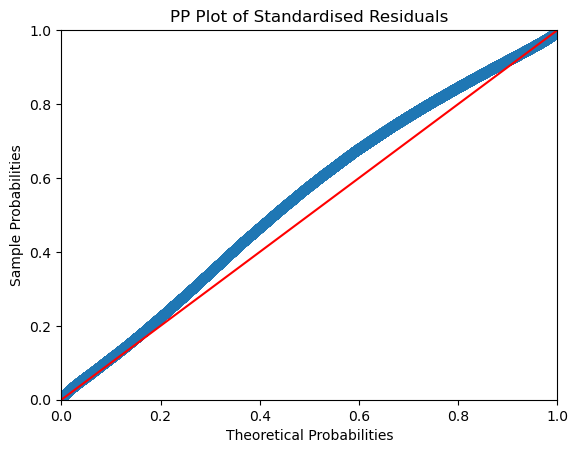

In [57]:
draw_ppplot(spotify_ols_model_2, 'PP Plot of Standardised Residuals')

In [58]:
def plot_resid_fitted(fitted, resid, title):
    plt.scatter(get_standardised_vals(fitted), get_standardised_vals(resid))
    plt.title(title)
    plt.xlabel('Standardised Predicted Value')
    plt.ylabel('Standardised residual value')
    plt.show()

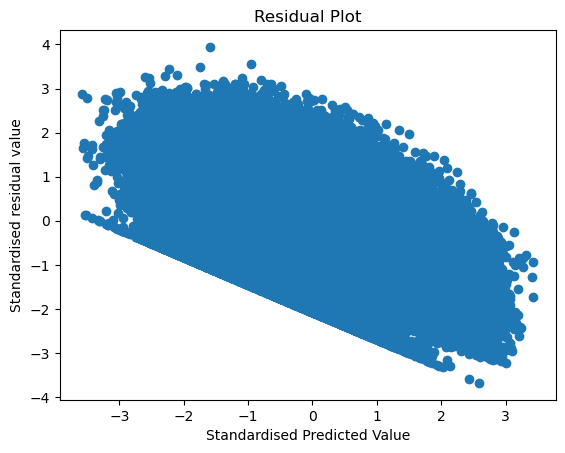

In [59]:
plot_resid_fitted(spotify_ols_model_2.fittedvalues, spotify_ols_model_2.resid, 'Residual Plot')

In [60]:
#detecting influencers
k = X_train.shape[1]
n = X_train.shape[0]

In [61]:
print('Number of variables:', k, 'number of observations:', n)

Number of variables: 9 number of observations: 186180


In [62]:
leverage_cutoff = 3*((k+1)/n)
print('Cut off for leverage value :', round(leverage_cutoff, 3))

Cut off for leverage value : 0.0


In [64]:
X_test = X_test[X_new_features]

In [65]:
y_pred = spotify_ols_model_2.predict(X_test)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
np.abs(r2_score(y_test, y_pred))

0.23412190001441324